# Autoencoders' training

In [1]:
# Importing libraries
import numpy as np
import nibabel as nib
import nilearn
import os
import glob
import matplotlib.pyplot as plt
import time
import random

from collections import OrderedDict

import torch 
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torchvision.datasets as datasets

import torchio as tio

from tqdm import tqdm
import pickle

%matplotlib inline

In [2]:
# Load network architectures
from Auxillary_files.CNN_architectures_loss_function import one_layer, two_layers, three_layers, DiceLoss

## 1-layer network

In [3]:
# Try setting CUDA if possible
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu") 

In [4]:
# Hyper-parameters sets for networks and training
network_sizes=[4,8,16,32,48,64,96,128]

criterion=DiceLoss()

number_of_epochs = 400

In [5]:
def train_network(model, dataloader, optimizer, criterion, n_epochs, device, save_path):
    
    track_validation_loss = []
    track_training_loss = []
    
    validation_loss_min = np.Inf
      
    for epoch in tqdm(range(1, n_epochs+1)):
        
        training_loss = []
        validation_loss = []
        
        # Train
        model.train()
        for batch_idx, batch in enumerate(dataloader['train']):
            
            data = batch['mask']['data']
            
            optimizer.zero_grad()
            
            output=model(data)
            
            loss=criterion(output[:,0], data[:,0])
            loss.mean().backward()
            
            optimizer.step()
            
            training_loss.append(loss.mean().item())
        
        # Validate
        model.eval()
        for batch_idx, batch in enumerate(dataloader['valid']):
            
            data = batch['mask']['data']
            
            with torch.no_grad():
                output = model(data)
                loss=criterion(output[:,0],data[:,0])
                
                validation_loss.append(loss.mean().item())
                
        # Calculate average loss per mean batch
        training_loss = sum(training_loss)/len(training_loss)
        validation_loss = sum(validation_loss)/len(validation_loss)
        
        # Print
        #print('Epoch {}: Mean training loss per batch {}, mean validation loss per batch {}'.format(epoch,training_loss,validation_loss))
            
        # Update best results for validation set
        if validation_loss < validation_loss_min:
            validation_loss_min = validation_loss
            torch.save(model.state_dict(),save_path+'optimal_weights.pt')
            
        # Add values to list
        track_training_loss.append(training_loss)
        track_validation_loss.append(validation_loss)
            
    return track_training_loss, track_validation_loss

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:27<00:00,  1.93it/s]


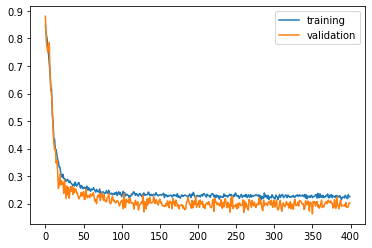

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:25<00:00,  1.94it/s]


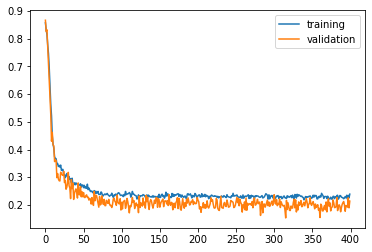

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:26<00:00,  1.94it/s]


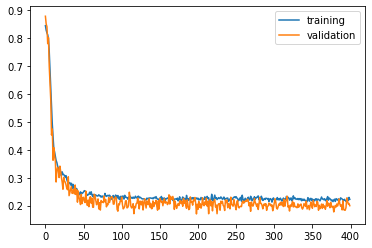

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:28<00:00,  1.92it/s]


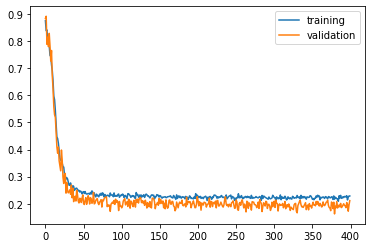

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:29<00:00,  1.91it/s]


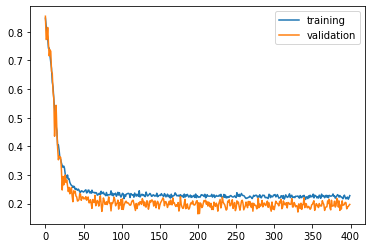

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:26<00:00,  1.93it/s]


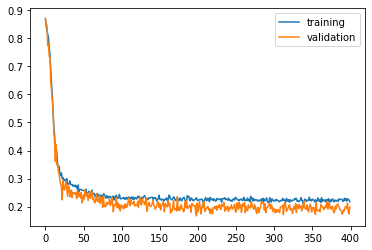

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:28<00:00,  1.92it/s]


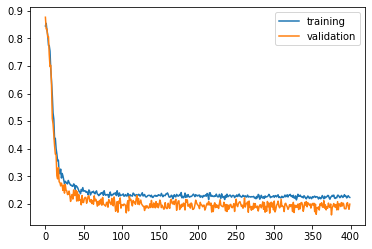

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:29<00:00,  1.91it/s]


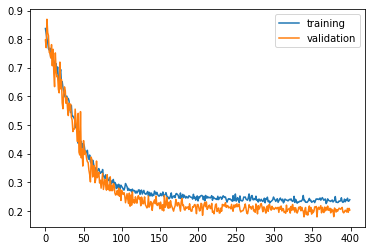

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:28<00:00,  1.92it/s]


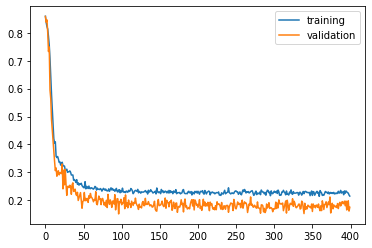

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:29<00:00,  1.91it/s]


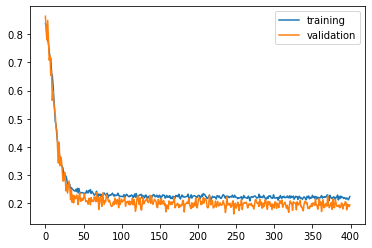

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:28<00:00,  1.92it/s]


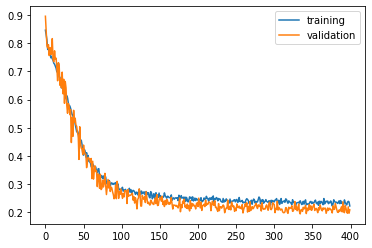

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:27<00:00,  1.92it/s]


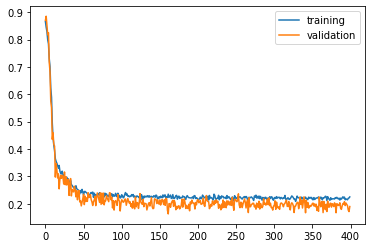

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:30<00:00,  1.90it/s]


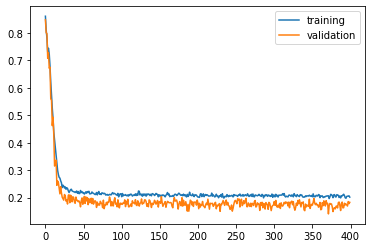

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:31<00:00,  1.90it/s]


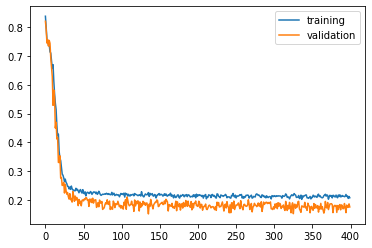

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:31<00:00,  1.89it/s]


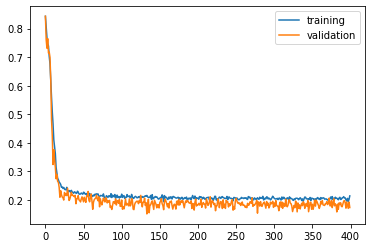

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:32<00:00,  1.88it/s]


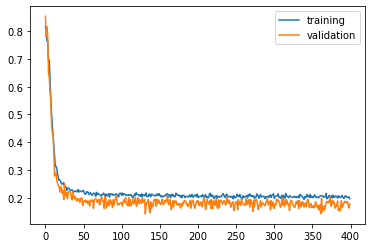

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:31<00:00,  1.89it/s]


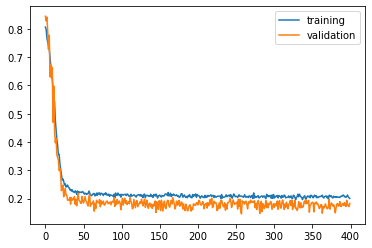

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:30<00:00,  1.90it/s]


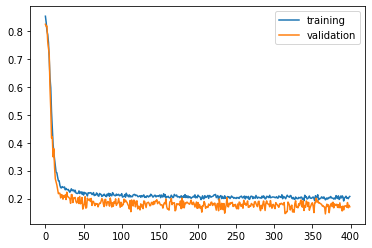

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:30<00:00,  1.90it/s]


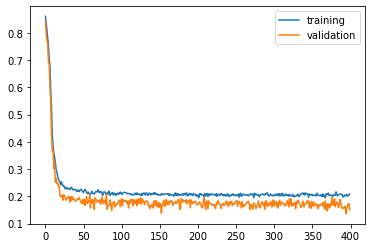

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:30<00:00,  1.90it/s]


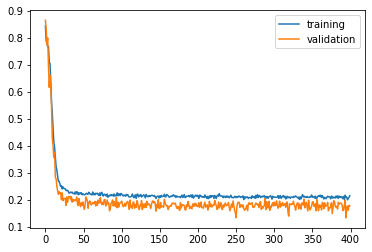

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:31<00:00,  1.89it/s]


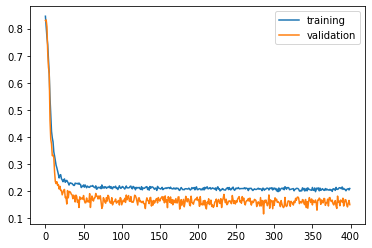

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:30<00:00,  1.90it/s]


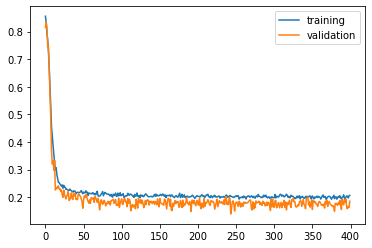

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:31<00:00,  1.89it/s]


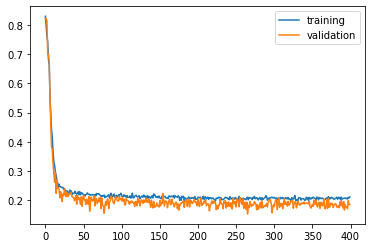

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:30<00:00,  1.90it/s]


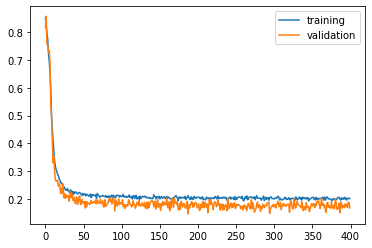

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:35<00:00,  1.86it/s]


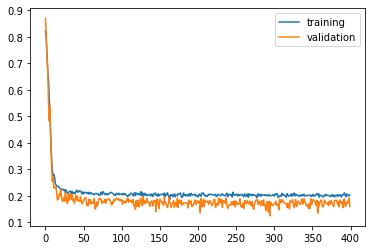

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:34<00:00,  1.87it/s]


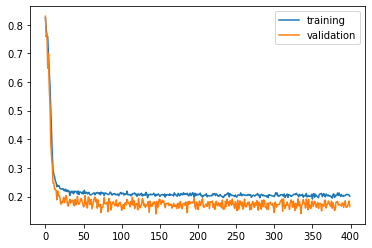

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:32<00:00,  1.88it/s]


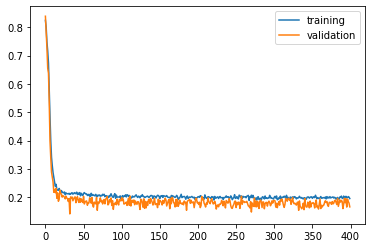

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:34<00:00,  1.87it/s]


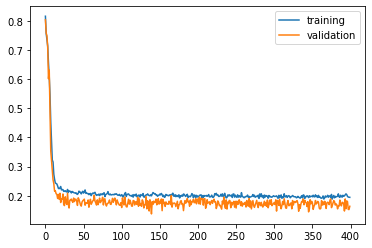

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


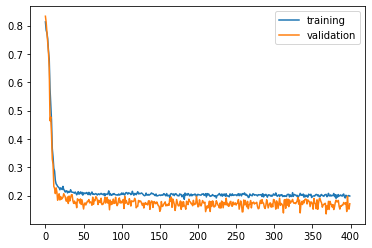

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:34<00:00,  1.86it/s]


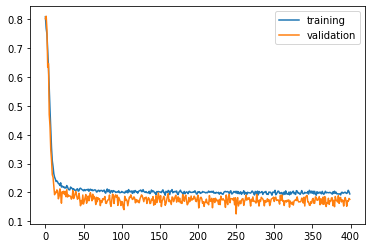

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:34<00:00,  1.87it/s]


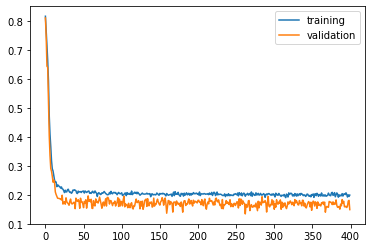

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


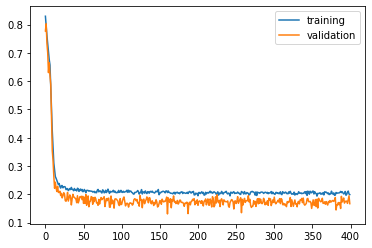

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


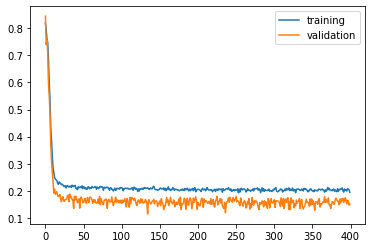

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


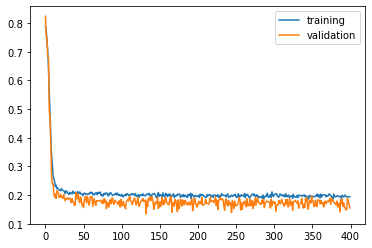

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:35<00:00,  1.85it/s]


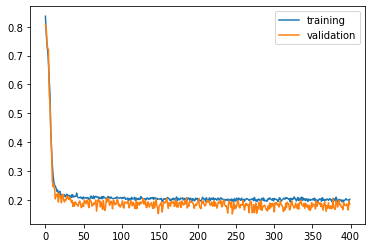

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


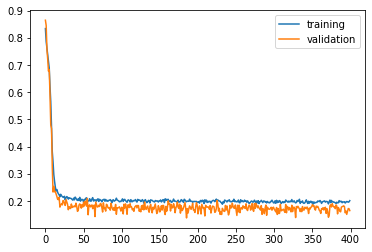

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:41<00:00,  1.80it/s]


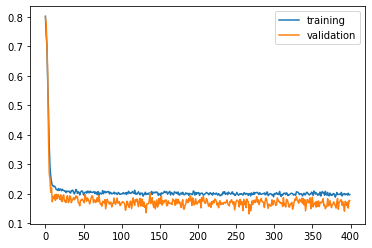

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:41<00:00,  1.80it/s]


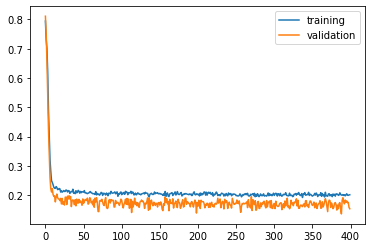

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:42<00:00,  1.80it/s]


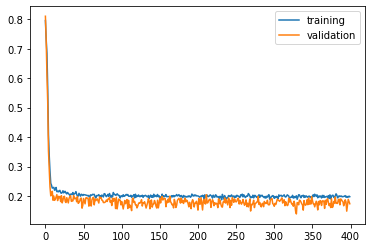

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:42<00:00,  1.80it/s]


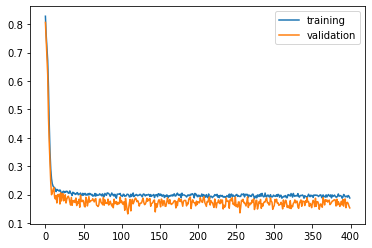

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:43<00:00,  1.79it/s]


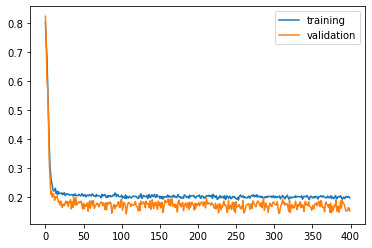

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:41<00:00,  1.80it/s]


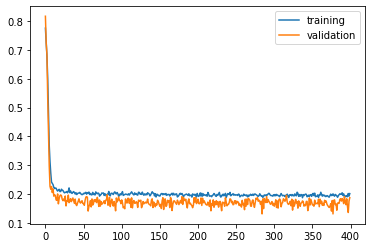

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


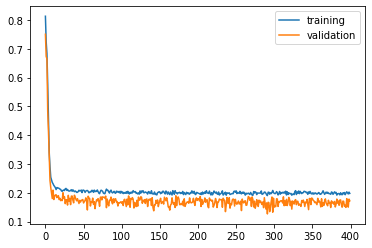

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:42<00:00,  1.80it/s]


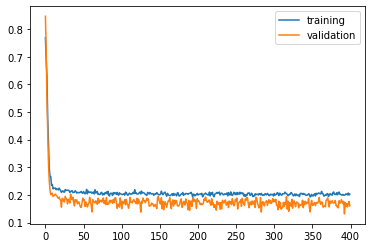

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


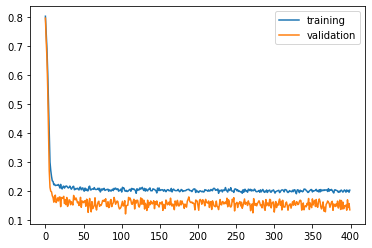

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


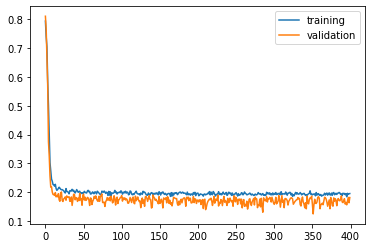

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


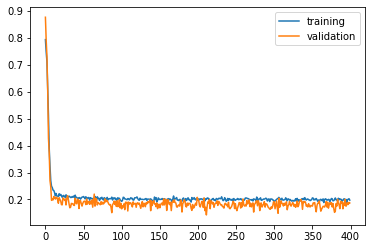

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:43<00:00,  1.79it/s]


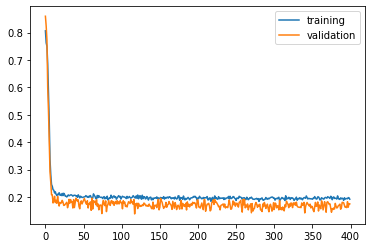

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:50<00:00,  1.74it/s]


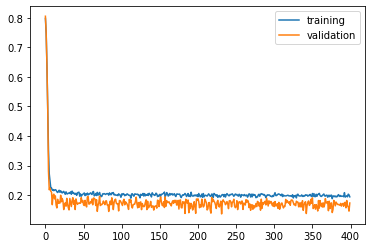

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:49<00:00,  1.75it/s]


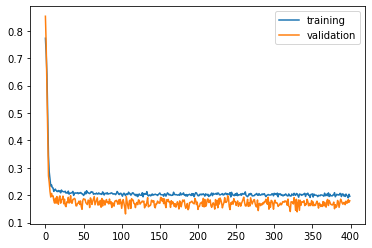

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:48<00:00,  1.75it/s]


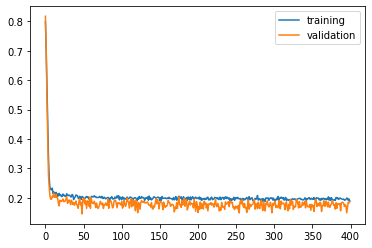

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:49<00:00,  1.75it/s]


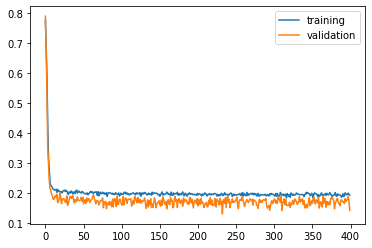

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:49<00:00,  1.74it/s]


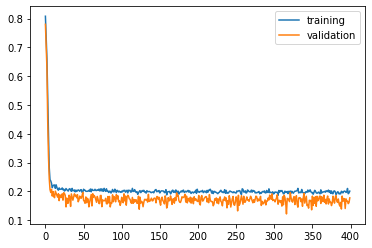

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:49<00:00,  1.75it/s]


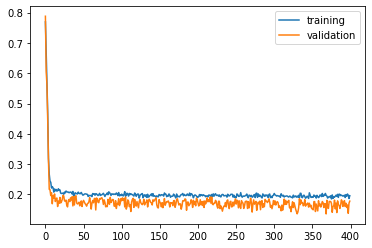

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:49<00:00,  1.75it/s]


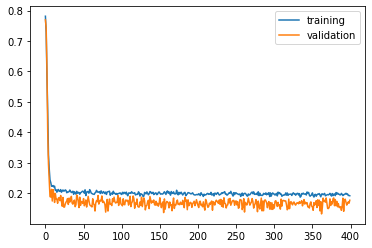

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:48<00:00,  1.75it/s]


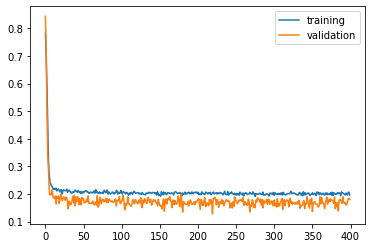

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:49<00:00,  1.74it/s]


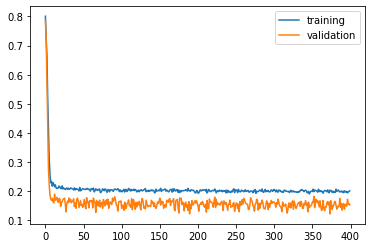

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:48<00:00,  1.75it/s]


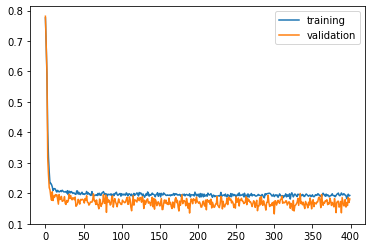

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:48<00:00,  1.75it/s]


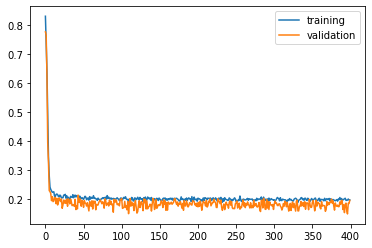

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:49<00:00,  1.74it/s]


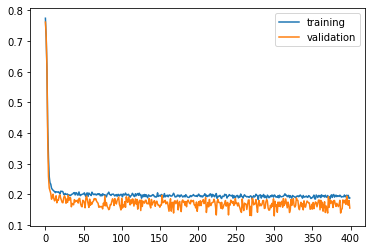

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


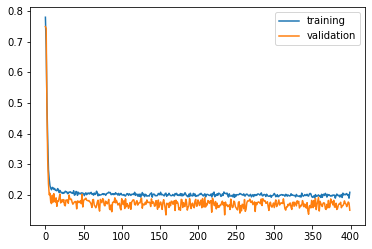

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:58<00:00,  1.68it/s]


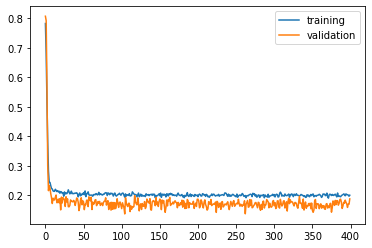

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:58<00:00,  1.68it/s]


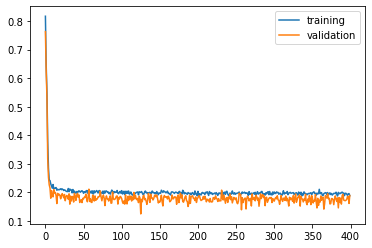

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:57<00:00,  1.68it/s]


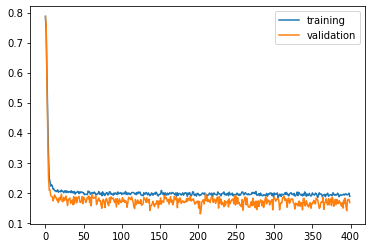

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [04:01<00:00,  1.65it/s]


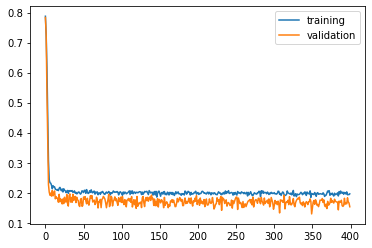

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:58<00:00,  1.67it/s]


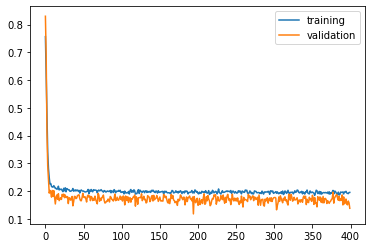

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:58<00:00,  1.67it/s]


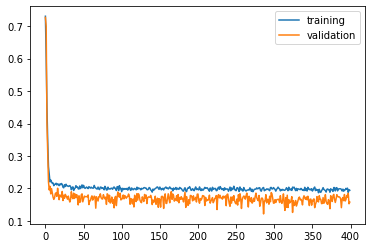

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:58<00:00,  1.68it/s]


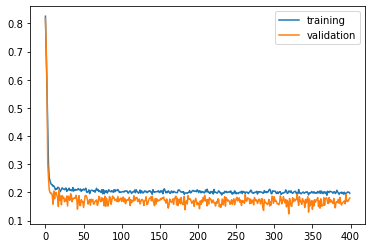

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:57<00:00,  1.68it/s]


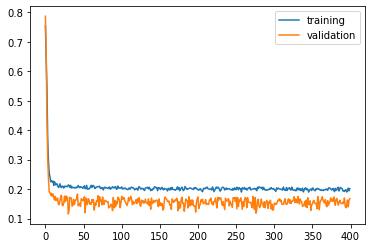

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:57<00:00,  1.69it/s]


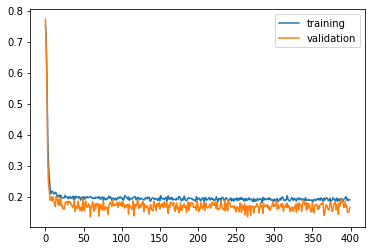

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:59<00:00,  1.67it/s]


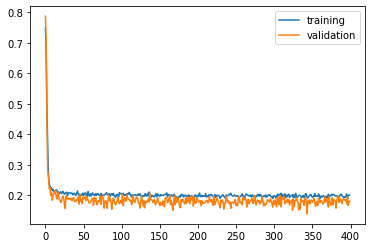

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:57<00:00,  1.68it/s]


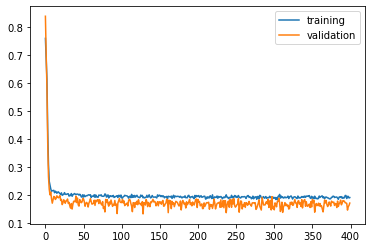

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [04:24<00:00,  1.51it/s]


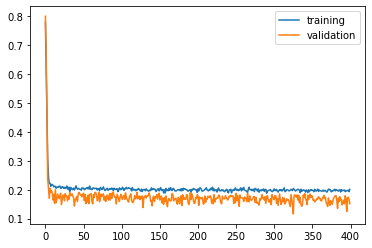

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


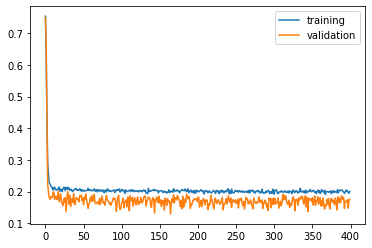

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


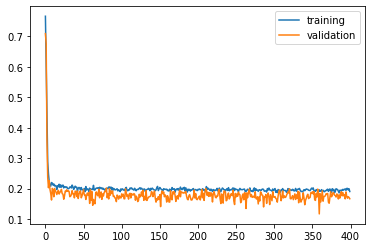

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [04:24<00:00,  1.52it/s]


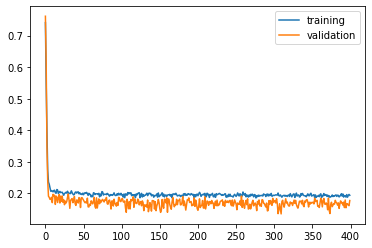

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


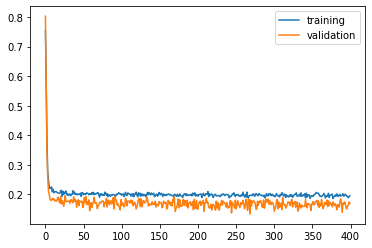

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [04:25<00:00,  1.51it/s]


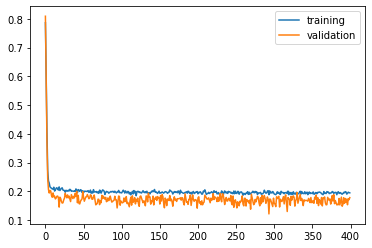

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [04:25<00:00,  1.51it/s]


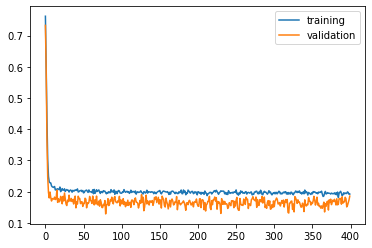

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


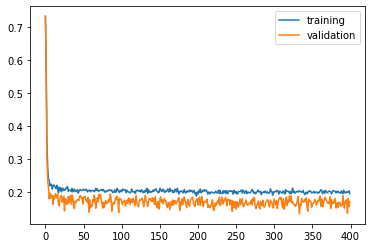

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [04:25<00:00,  1.51it/s]


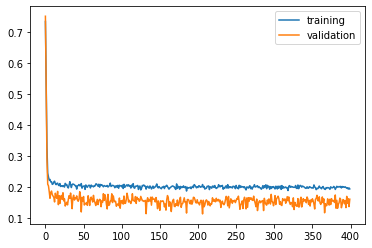

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [04:25<00:00,  1.51it/s]


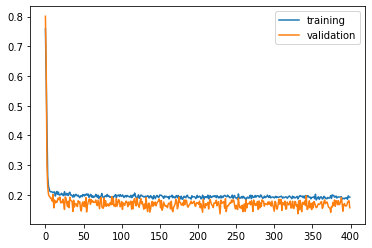

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [04:25<00:00,  1.51it/s]


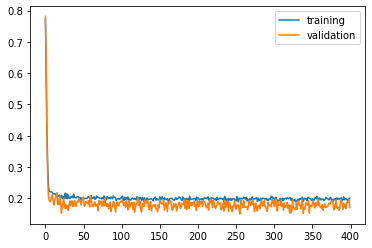

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [04:23<00:00,  1.52it/s]


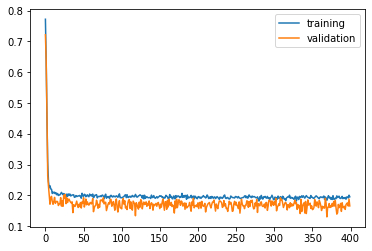

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [04:46<00:00,  1.40it/s]


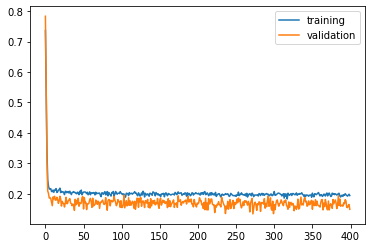

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [04:46<00:00,  1.39it/s]


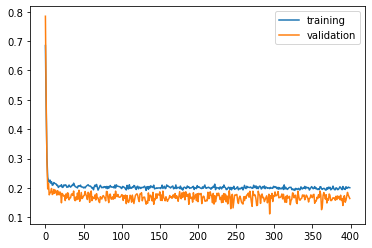

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [04:46<00:00,  1.40it/s]


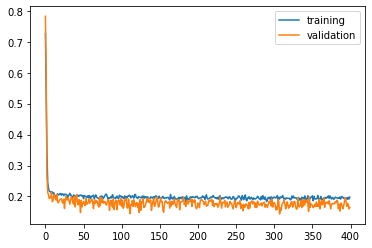

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [04:46<00:00,  1.40it/s]


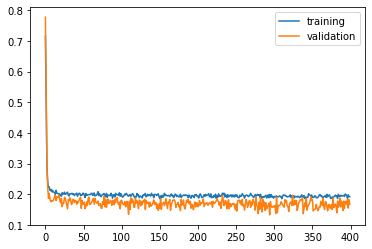

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [04:46<00:00,  1.40it/s]


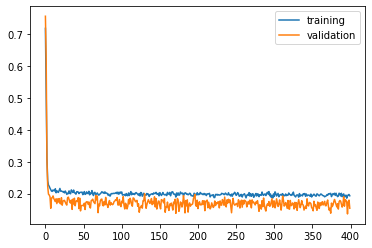

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [04:47<00:00,  1.39it/s]


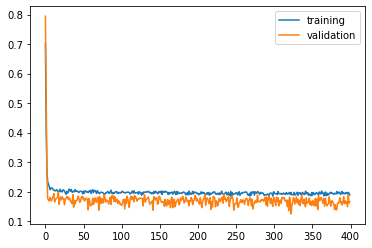

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [04:48<00:00,  1.39it/s]


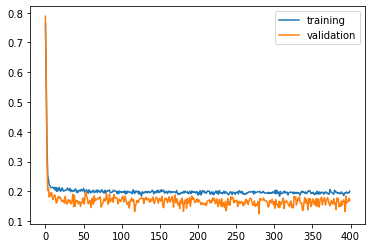

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [04:48<00:00,  1.39it/s]


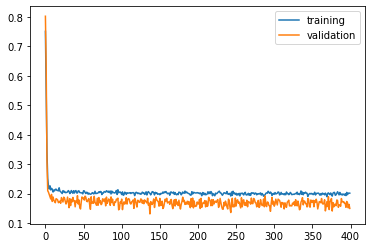

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [04:49<00:00,  1.38it/s]


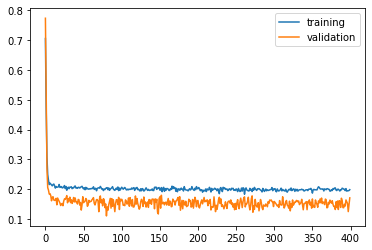

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [04:48<00:00,  1.39it/s]


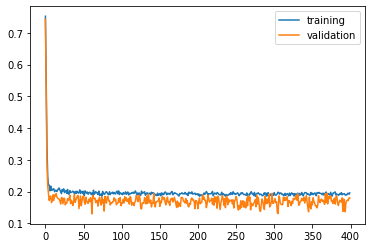

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [04:48<00:00,  1.39it/s]


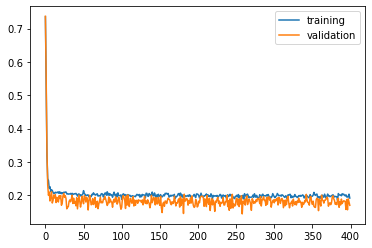

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [04:48<00:00,  1.39it/s]


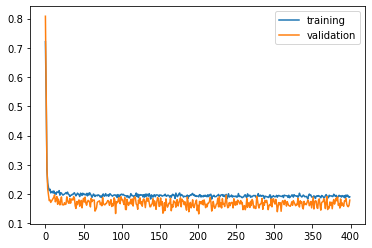

In [6]:
for network_size in network_sizes:
    
    # Use different dataloaders
    for k_fold in range(12):
        
        print('6-fold validation, stack {}'.format(k_fold+1))
        
        network = one_layer(network_size,0)
        
        # Print number of parameters
        #pytorch_total_params = sum(p.numel() for p in network.parameters())
        #print(pytorch_total_params)
    
        optimizer = torch.optim.Adam(params=network.parameters(), lr=0.005)
        
        dataloader = torch.load('Auxillary_files/Dataloaders/dataloader_'+str(k_fold+1)+'.pth')
        
        # Define savepath and create corresponding folder
        savepath='../0_Data/3_Autoencoders/'+'one_layer/'+str(network_size)+'_'+str(0)+'/'+str(k_fold+1)+'/'
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        
        # train
        track_training_loss, track_validation_loss = train_network(network,dataloader,optimizer,criterion, number_of_epochs, device, savepath)
        
        # print training results
        plt.plot(track_training_loss)
        plt.plot(track_validation_loss)
        plt.legend(['training','validation'])
        plt.show()
        
        # save tracked results
        with open(savepath+'track_training.txt','wb') as file:
            pickle.dump(track_training_loss,file)
            
        with open(savepath+'track_validation.txt','wb') as file:
            pickle.dump(track_validation_loss,file)
        
        # load the optimal weights
        network.load_state_dict(torch.load(savepath+'optimal_weights.pt'))    
        network.eval()
        
        # evaluate test dataset
        for batch_idx, batch in enumerate(dataloader['test']):
            
            data = batch['mask']['data']
            
            with torch.no_grad():
                output = network(data)
                
                output_data = (output.detach().numpy()[0,0]>0.5).astype(int)
                img = nib.Nifti1Image(output_data,batch['mask']['affine'].numpy().squeeze())
                
                nib.save(img,savepath+os.path.basename(os.path.dirname(batch['mask']['path'][0]))+'.nii.gz')               
                
                #loss=criterion(output[:,0],data[:,0])
                #print(loss.mean().item())
    
                #plt.subplot(1,2,1)
                #plt.imshow(data[0,0,:,:,4])
                #plt.subplot(1,2,2)
                #plt.imshow(output.detach().numpy()[0,0,:,:,4]>0.5)
                #plt.show()    

In [6]:
network_sizes=[128] #[4,8,16,32,48,64,96,128]

6-fold validation, stack 1


100%|██████████| 400/400 [13:17<00:00,  1.99s/it]


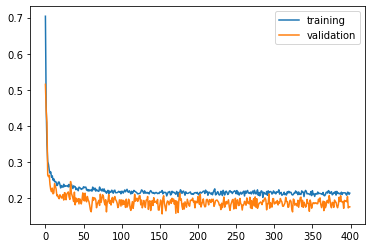

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [12:51<00:00,  1.93s/it]


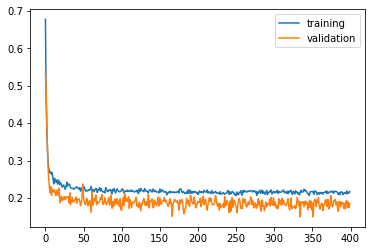

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [12:36<00:00,  1.89s/it]


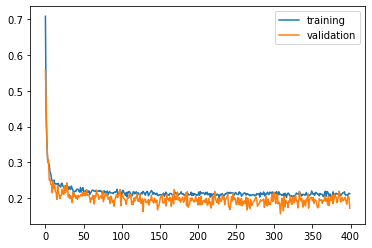

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [13:25<00:00,  2.01s/it]


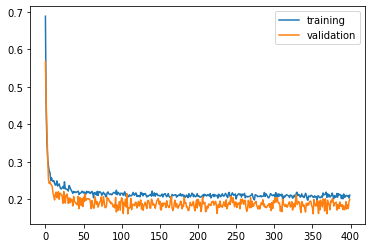

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [12:32<00:00,  1.88s/it]


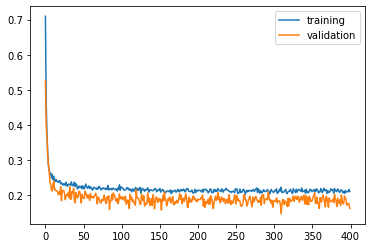

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [12:34<00:00,  1.89s/it]


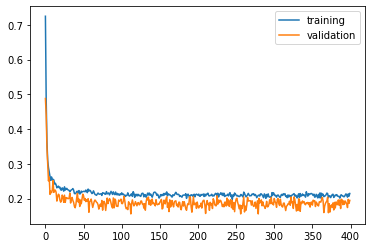

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [12:55<00:00,  1.94s/it]


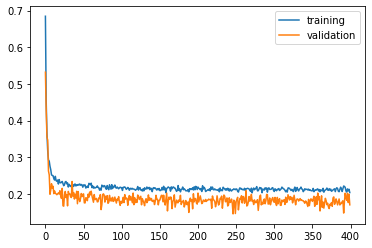

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [12:29<00:00,  1.87s/it]


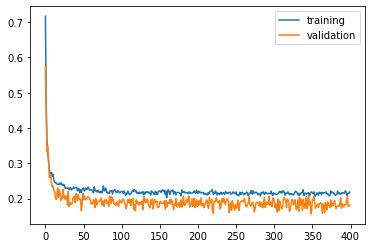

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [13:14<00:00,  1.99s/it]


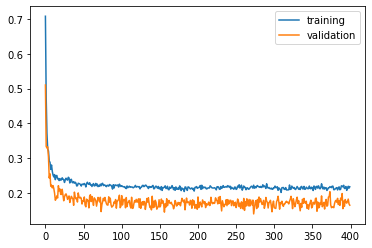

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [12:44<00:00,  1.91s/it]


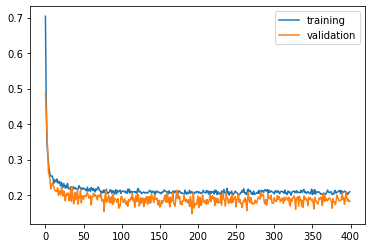

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [12:41<00:00,  1.90s/it]


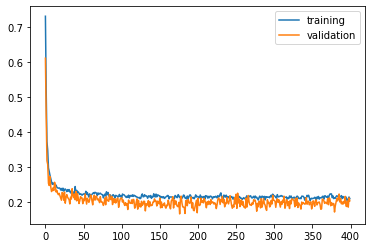

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [12:36<00:00,  1.89s/it]


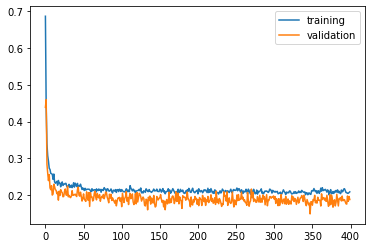

In [7]:
for network_size in network_sizes:
    
    # Use different dataloaders
    for k_fold in range(12):
        
        print('6-fold validation, stack {}'.format(k_fold+1))
        
        network = two_layers(network_size,2)
        
        # Print number of parameters
        #pytorch_total_params = sum(p.numel() for p in network.parameters())
        #print(pytorch_total_params)
    
        optimizer = torch.optim.Adam(params=network.parameters(), lr=0.005)
        
        dataloader = torch.load('Auxillary_files/Dataloaders/dataloader_'+str(k_fold+1)+'.pth')
        
        # Define savepath and create corresponding folder
        savepath='../0_Data/3_Autoencoders/'+'two_layers/'+str(network_size)+'_'+str(2)+'/'+str(k_fold+1)+'/'
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        
        # train
        track_training_loss, track_validation_loss = train_network(network,dataloader,optimizer,criterion, number_of_epochs, device, savepath)
        
        # print training results
        plt.plot(track_training_loss)
        plt.plot(track_validation_loss)
        plt.legend(['training','validation'])
        plt.show()
        
        # save tracked results
        with open(savepath+'track_training.txt','wb') as file:
            pickle.dump(track_training_loss,file)
            
        with open(savepath+'track_validation.txt','wb') as file:
            pickle.dump(track_validation_loss,file)
        
        # load the optimal weights
        network.load_state_dict(torch.load(savepath+'optimal_weights.pt'))    
        network.eval()
        
        # evaluate test dataset
        for batch_idx, batch in enumerate(dataloader['test']):
            
            data = batch['mask']['data']
            
            with torch.no_grad():
                output = network(data)
                
                output_data = (output.detach().numpy()[0,0]>0.5).astype(int)
                img = nib.Nifti1Image(output_data,batch['mask']['affine'].numpy().squeeze())
                
                nib.save(img,savepath+os.path.basename(os.path.dirname(batch['mask']['path'][0]))+'.nii.gz')               
                
                #loss=criterion(output[:,0],data[:,0])
                #print(loss.mean().item())
    
                #plt.subplot(1,2,1)
                #plt.imshow(data[0,0,:,:,4])
                #plt.subplot(1,2,2)
                #plt.imshow(output.detach().numpy()[0,0,:,:,4]>0.5)
                #plt.show()    

In [8]:
network_sizes=[4,8,16,32,48,64,96,128]

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:34<00:00,  1.86it/s]


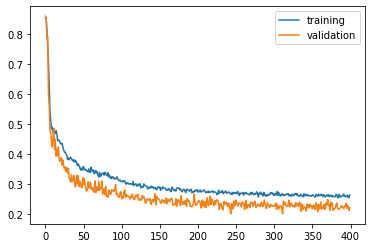

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:34<00:00,  1.86it/s]


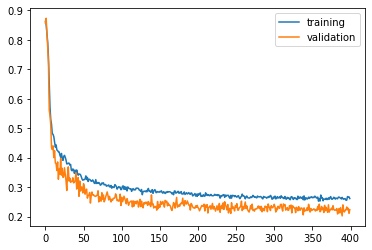

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:34<00:00,  1.86it/s]


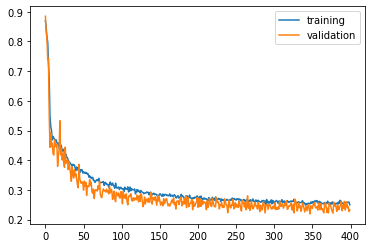

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:36<00:00,  1.84it/s]


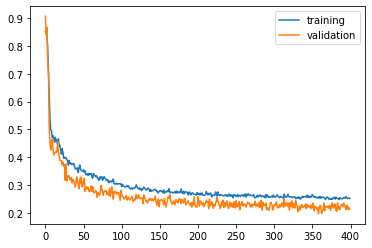

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:34<00:00,  1.87it/s]


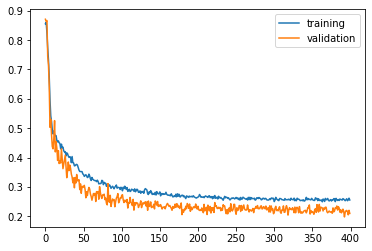

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:34<00:00,  1.86it/s]


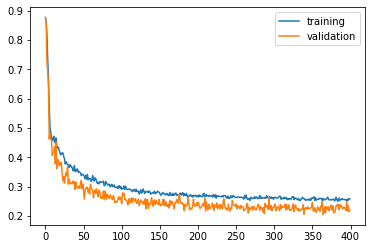

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:34<00:00,  1.87it/s]


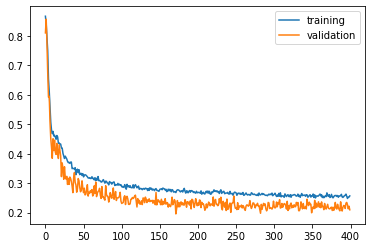

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:36<00:00,  1.85it/s]


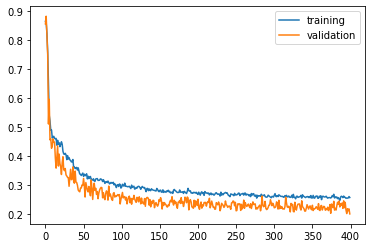

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


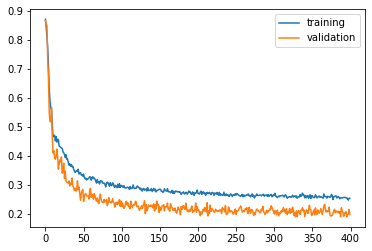

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:34<00:00,  1.86it/s]


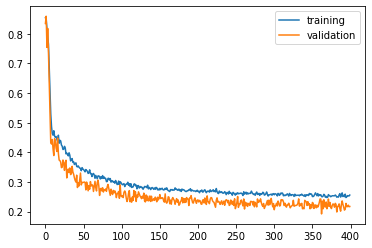

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:33<00:00,  1.87it/s]


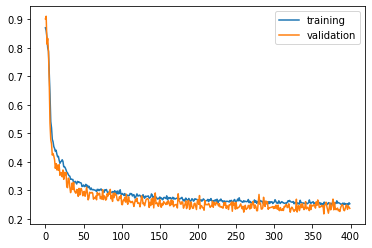

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:36<00:00,  1.85it/s]


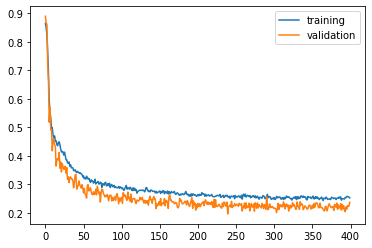

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [03:39<00:00,  1.82it/s]


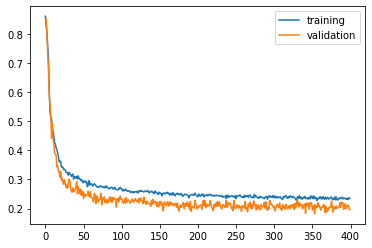

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [03:40<00:00,  1.82it/s]


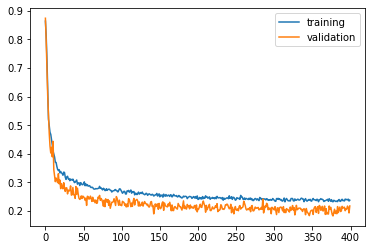

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


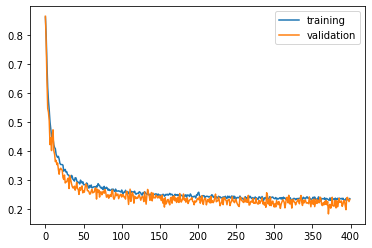

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [03:40<00:00,  1.81it/s]


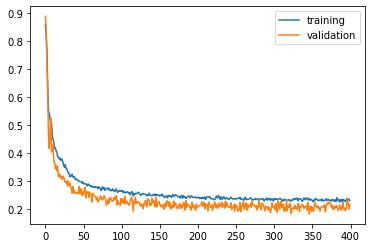

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


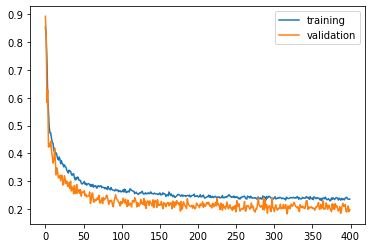

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [03:40<00:00,  1.81it/s]


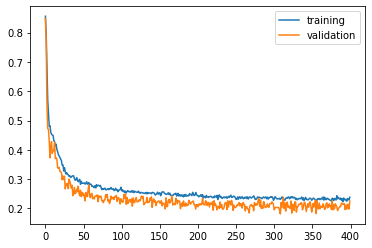

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [03:40<00:00,  1.82it/s]


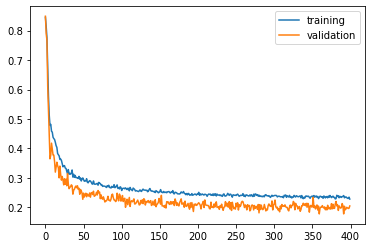

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [03:39<00:00,  1.82it/s]


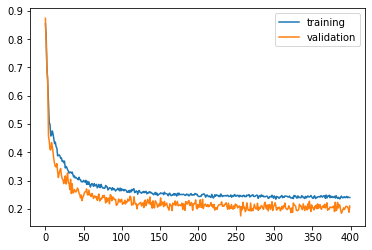

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [03:39<00:00,  1.82it/s]


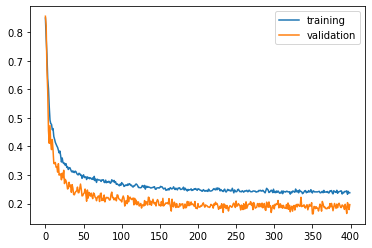

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [03:41<00:00,  1.81it/s]


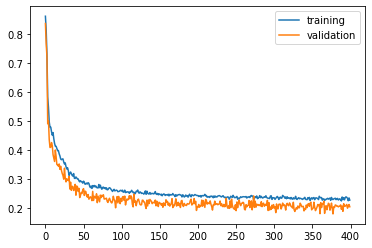

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [03:40<00:00,  1.81it/s]


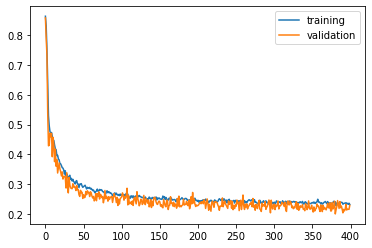

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [03:40<00:00,  1.81it/s]


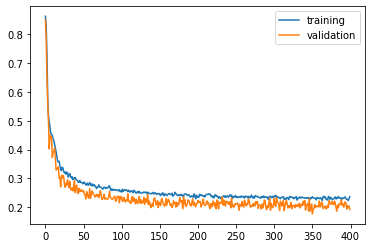

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


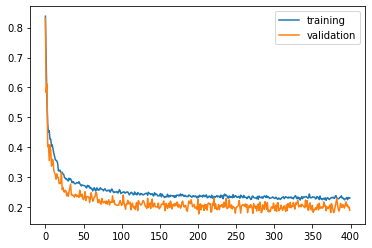

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [04:03<00:00,  1.64it/s]


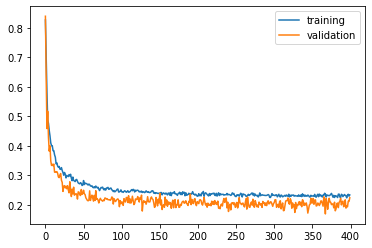

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


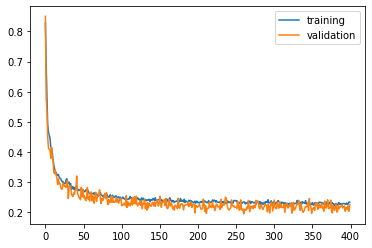

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


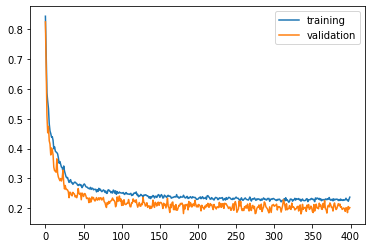

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


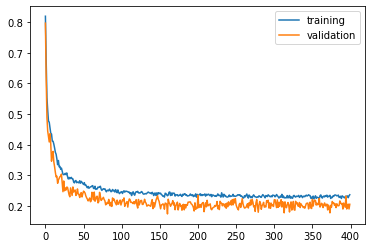

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [04:01<00:00,  1.66it/s]


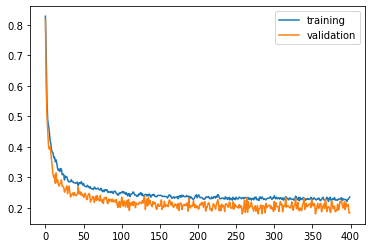

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [04:01<00:00,  1.65it/s]


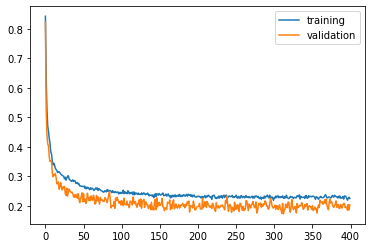

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


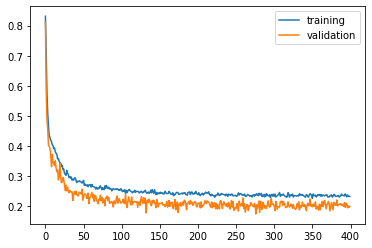

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


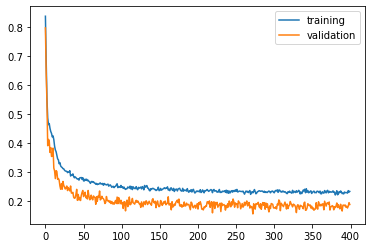

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [04:02<00:00,  1.65it/s]


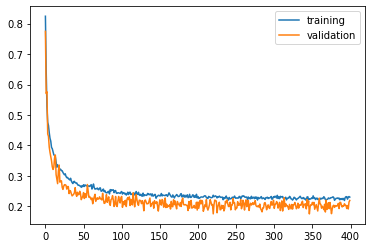

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [04:01<00:00,  1.65it/s]


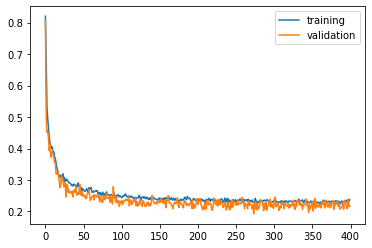

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [04:01<00:00,  1.65it/s]


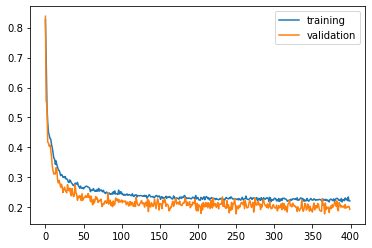

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [05:06<00:00,  1.31it/s]


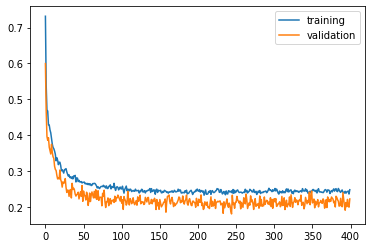

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [05:07<00:00,  1.30it/s]


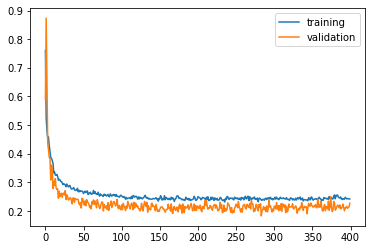

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [05:05<00:00,  1.31it/s]


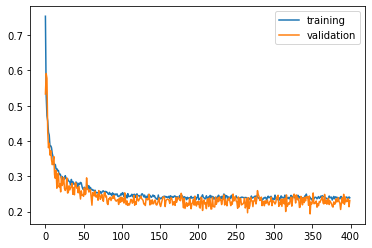

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [05:07<00:00,  1.30it/s]


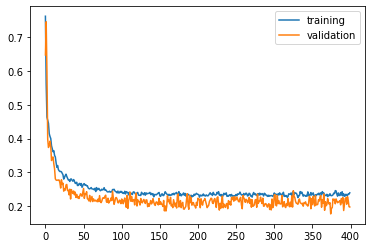

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [05:04<00:00,  1.31it/s]


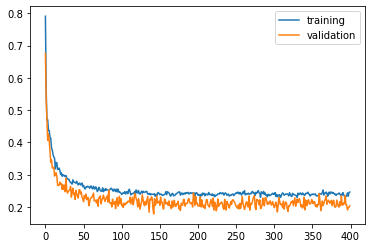

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [05:04<00:00,  1.31it/s]


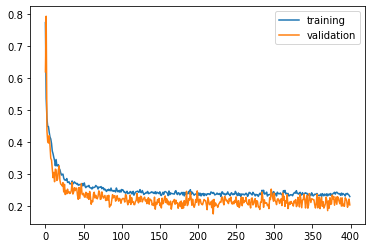

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [05:07<00:00,  1.30it/s]


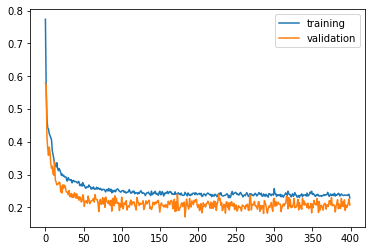

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [05:06<00:00,  1.31it/s]


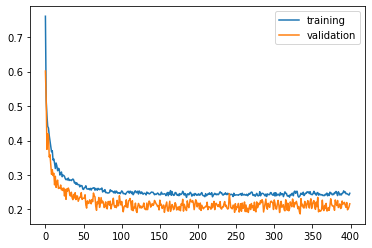

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [05:05<00:00,  1.31it/s]


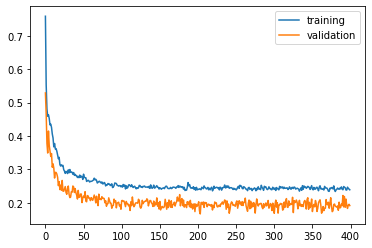

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [05:04<00:00,  1.31it/s]


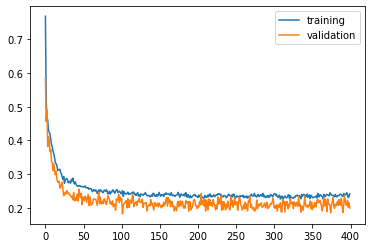

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [05:04<00:00,  1.32it/s]


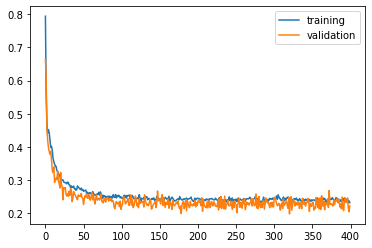

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [05:05<00:00,  1.31it/s]


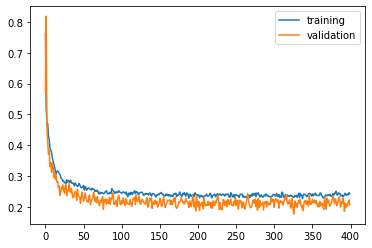

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [06:10<00:00,  1.08it/s]


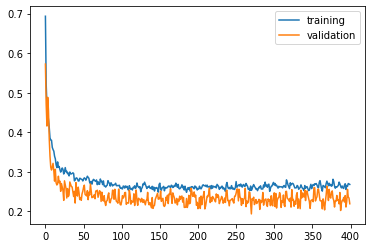

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [06:10<00:00,  1.08it/s]


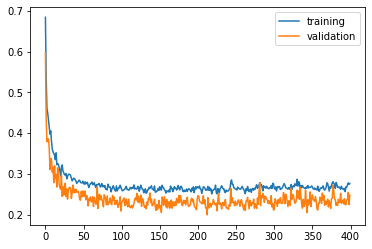

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [06:08<00:00,  1.09it/s]


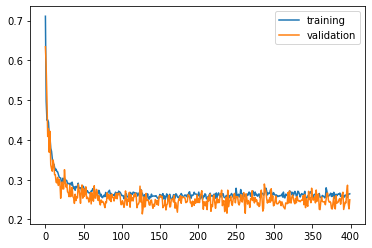

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [06:10<00:00,  1.08it/s]


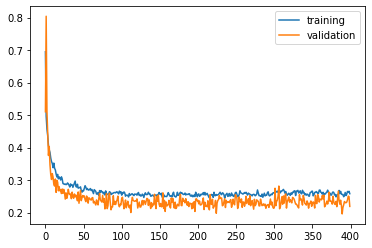

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [06:12<00:00,  1.07it/s]


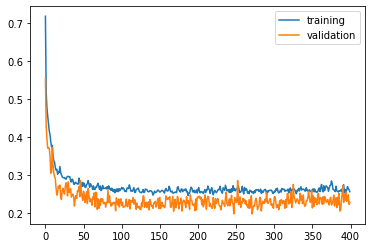

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [06:06<00:00,  1.09it/s]


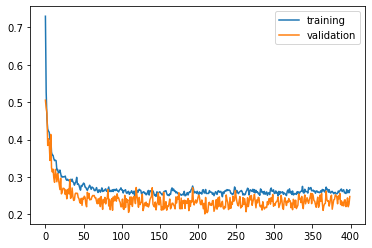

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [06:09<00:00,  1.08it/s]


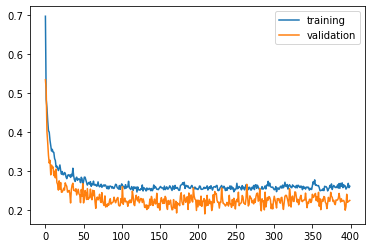

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [06:11<00:00,  1.08it/s]


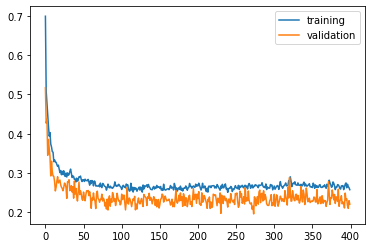

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [06:09<00:00,  1.08it/s]


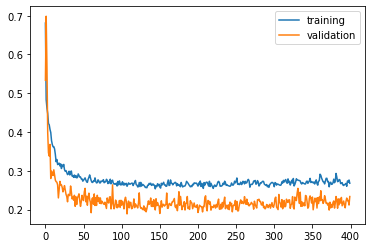

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [06:07<00:00,  1.09it/s]


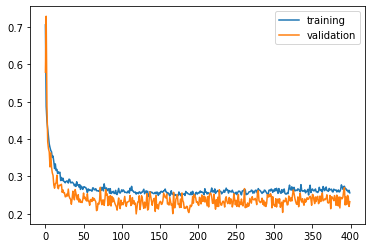

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [06:09<00:00,  1.08it/s]


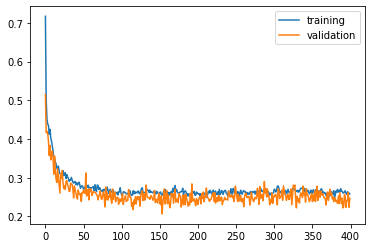

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [06:11<00:00,  1.08it/s]


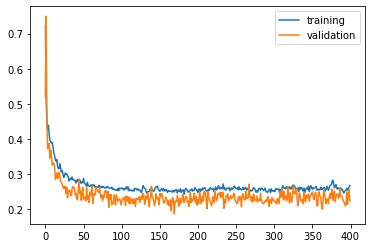

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [06:58<00:00,  1.05s/it]


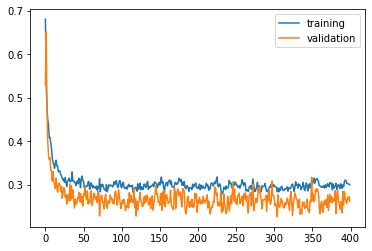

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [07:05<00:00,  1.06s/it]


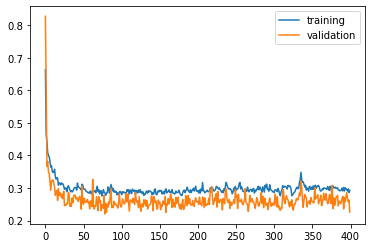

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [06:59<00:00,  1.05s/it]


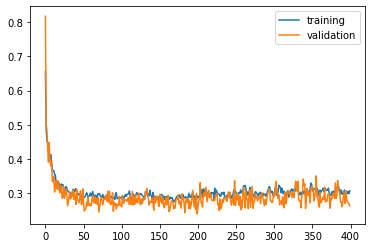

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [07:07<00:00,  1.07s/it]


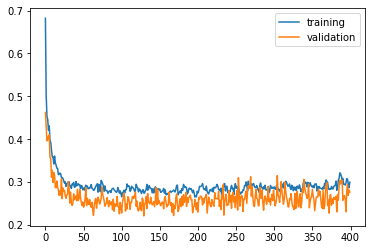

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [07:03<00:00,  1.06s/it]


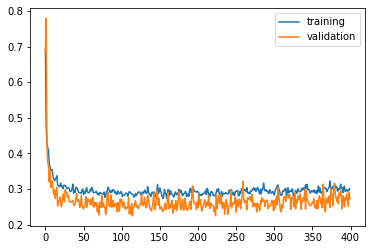

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [07:03<00:00,  1.06s/it]


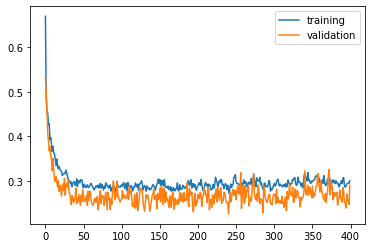

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [07:04<00:00,  1.06s/it]


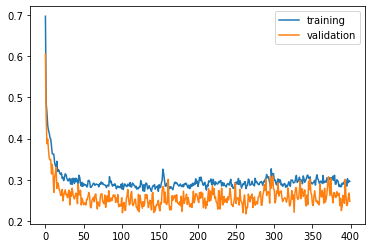

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [07:01<00:00,  1.05s/it]


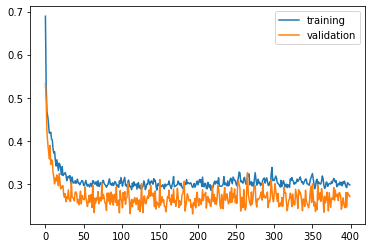

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [07:02<00:00,  1.06s/it]


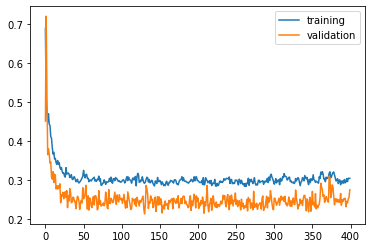

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [07:02<00:00,  1.06s/it]


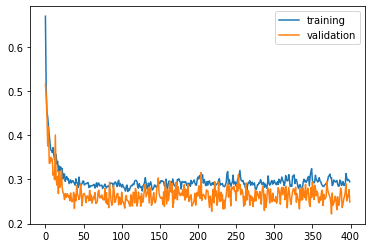

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [07:01<00:00,  1.05s/it]


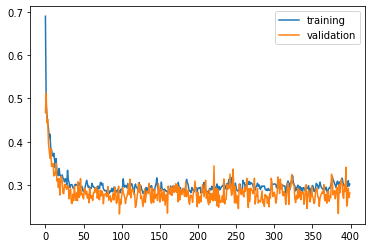

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [07:02<00:00,  1.06s/it]


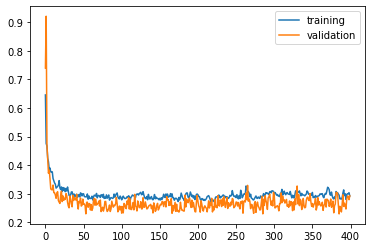

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [08:59<00:00,  1.35s/it]


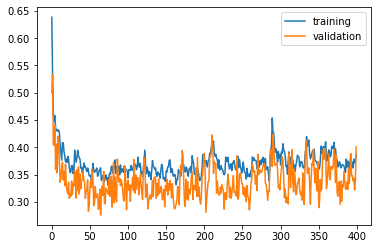

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [09:01<00:00,  1.35s/it]


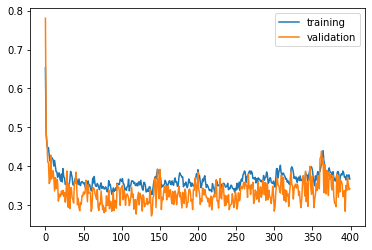

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [09:03<00:00,  1.36s/it]


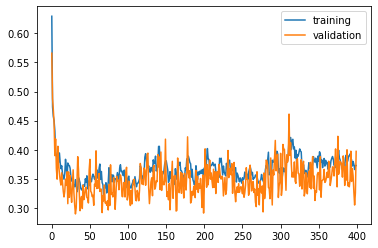

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [08:58<00:00,  1.35s/it]


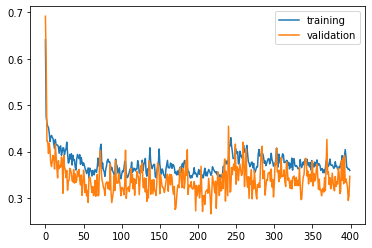

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [08:58<00:00,  1.35s/it]


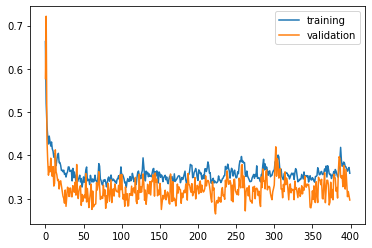

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [09:01<00:00,  1.35s/it]


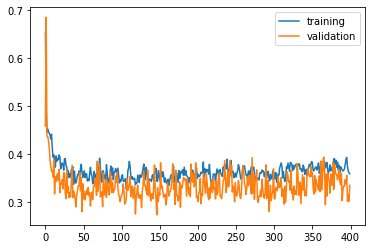

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [09:06<00:00,  1.37s/it]


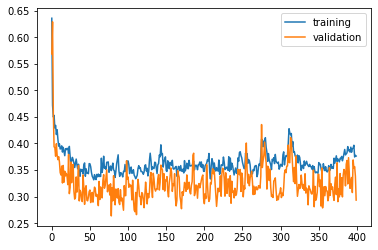

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [09:01<00:00,  1.35s/it]


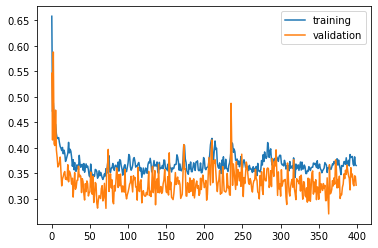

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [09:00<00:00,  1.35s/it]


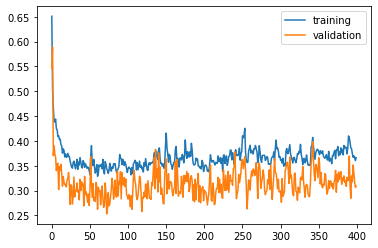

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [08:59<00:00,  1.35s/it]


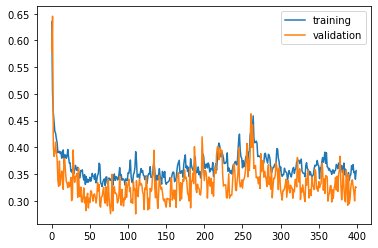

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [08:58<00:00,  1.35s/it]


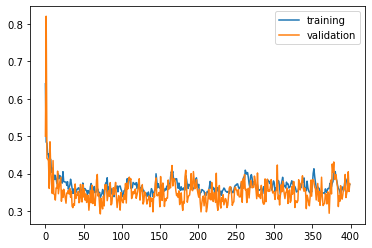

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [08:56<00:00,  1.34s/it]


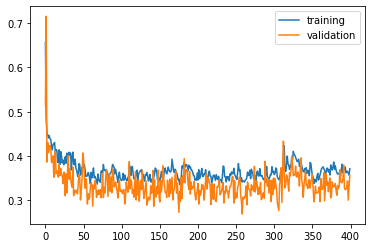

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 1


100%|██████████| 400/400 [12:28<00:00,  1.87s/it]


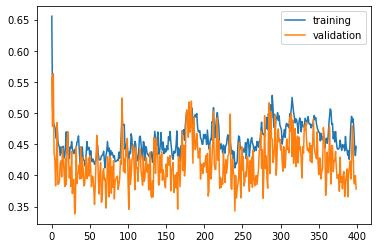

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 2


100%|██████████| 400/400 [11:56<00:00,  1.79s/it]


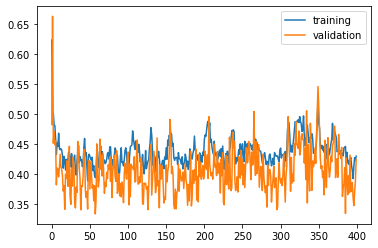

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 3


100%|██████████| 400/400 [12:02<00:00,  1.81s/it]


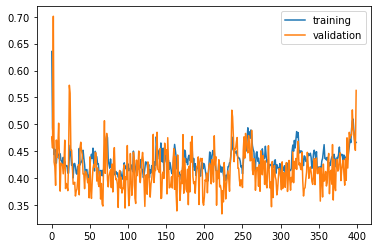

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 4


100%|██████████| 400/400 [12:10<00:00,  1.83s/it]


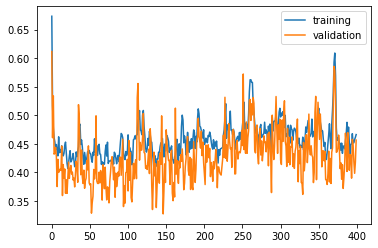

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 5


100%|██████████| 400/400 [12:15<00:00,  1.84s/it]


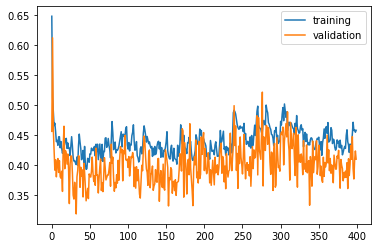

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 6


100%|██████████| 400/400 [11:53<00:00,  1.78s/it]


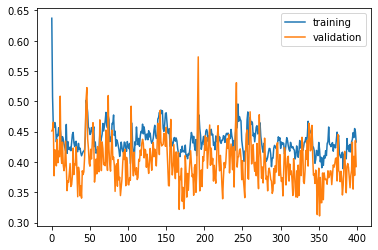

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 7


100%|██████████| 400/400 [12:08<00:00,  1.82s/it]


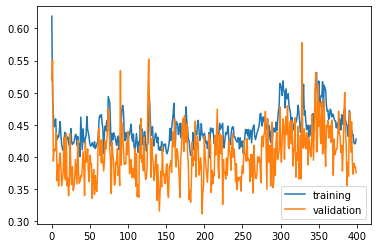

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 8


100%|██████████| 400/400 [11:58<00:00,  1.80s/it]


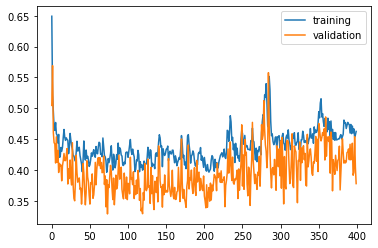

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 9


100%|██████████| 400/400 [12:01<00:00,  1.80s/it]


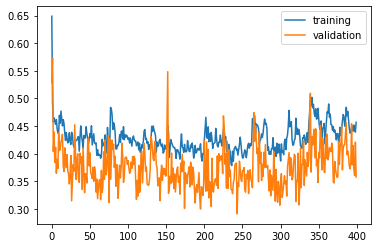

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 10


100%|██████████| 400/400 [12:18<00:00,  1.85s/it]


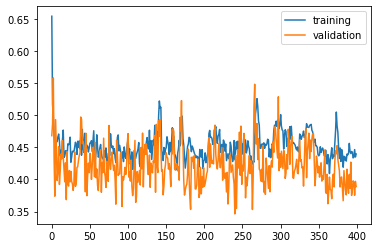

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 11


100%|██████████| 400/400 [11:53<00:00,  1.78s/it]


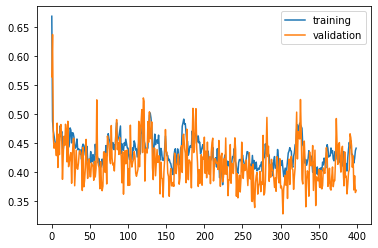

  0%|          | 0/400 [00:00<?, ?it/s]

6-fold validation, stack 12


100%|██████████| 400/400 [12:10<00:00,  1.83s/it]


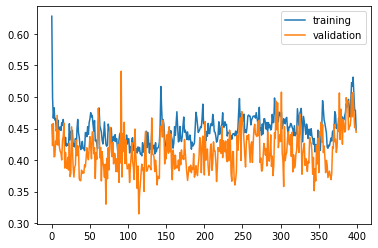

In [9]:
for network_size in network_sizes:
    
    # Use different dataloaders
    for k_fold in range(12):
        
        print('6-fold validation, stack {}'.format(k_fold+1))
        
        network = three_layers(network_size,2)
        
        # Print number of parameters
        #pytorch_total_params = sum(p.numel() for p in network.parameters())
        #print(pytorch_total_params)
    
        optimizer = torch.optim.Adam(params=network.parameters(), lr=0.005)
        
        dataloader = torch.load('Auxillary_files/Dataloaders/dataloader_'+str(k_fold+1)+'.pth')
        
        # Define savepath and create corresponding folder
        savepath='../0_Data/3_Autoencoders/'+'three_layers/'+str(network_size)+'_'+str(2)+'/'+str(k_fold+1)+'/'
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        
        # train
        track_training_loss, track_validation_loss = train_network(network,dataloader,optimizer,criterion, number_of_epochs, device, savepath)
        
        # print training results
        plt.plot(track_training_loss)
        plt.plot(track_validation_loss)
        plt.legend(['training','validation'])
        plt.show()
        
        # save tracked results
        with open(savepath+'track_training.txt','wb') as file:
            pickle.dump(track_training_loss,file)
            
        with open(savepath+'track_validation.txt','wb') as file:
            pickle.dump(track_validation_loss,file)
        
        # load the optimal weights
        network.load_state_dict(torch.load(savepath+'optimal_weights.pt'))    
        network.eval()
        
        # evaluate test dataset
        for batch_idx, batch in enumerate(dataloader['test']):
            
            data = batch['mask']['data']
            
            with torch.no_grad():
                output = network(data)
                
                output_data = (output.detach().numpy()[0,0]>0.5).astype(int)
                img = nib.Nifti1Image(output_data,batch['mask']['affine'].numpy().squeeze())
                
                nib.save(img,savepath+os.path.basename(os.path.dirname(batch['mask']['path'][0]))+'.nii.gz')               
                
                #loss=criterion(output[:,0],data[:,0])
                #print(loss.mean().item())
    
                #plt.subplot(1,2,1)
                #plt.imshow(data[0,0,:,:,4])
                #plt.subplot(1,2,2)
                #plt.imshow(output.detach().numpy()[0,0,:,:,4]>0.5)
                #plt.show()    